### Model Training 

#### 1.1 Import Data and required libraries

In [5]:
# Basic libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('data/stud.csv')

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preperation of X and Y 

In [33]:
x = df.drop(columns=['math_score'],axis=1)
y = df['math_score']


In [34]:
print('Categories in the gender variable: ', end=' ')
print(df['gender'].unique())
print('*----------------------------------------------------------------------*')

print('Categories in the parental level education: ',end=' ')
print(df['parental_level_of_education'].unique())
print('*----------------------------------------------------------------------*')

print('Categories in race_ethinicity variable: ',end=' ')
print(df['race_ethnicity'].unique())
print('*----------------------------------------------------------------------*')

print('Categories in lunch variable: ', end=' ')
print(df['lunch'].unique())
print('*----------------------------------------------------------------------*')

print('Categories in test preperation course variable',end =' ')
print(df['lunch'].unique())
print('*----------------------------------------------------------------------*')



Categories in the gender variable:  ['female' 'male']
*----------------------------------------------------------------------*
Categories in the parental level education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
*----------------------------------------------------------------------*
Categories in race_ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
*----------------------------------------------------------------------*
Categories in lunch variable:  ['standard' 'free/reduced']
*----------------------------------------------------------------------*
Categories in test preperation course variable ['standard' 'free/reduced']
*----------------------------------------------------------------------*


In [35]:
print(x)

     gender race_ethnicity  ... reading_score writing_score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 7 columns]


In [36]:
# Creating a column transformer 

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns


In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer 

In [38]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScalar',numeric_transformer,num_features)]
)

In [39]:
X = preprocessor.fit_transform(x)

In [42]:
X.shape

(1000, 19)

In [43]:
# Train test split 
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

##### Lets create Evaluation metrics to give after a model training 

In [66]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_sc = r2_score(true,predicted)
    return mae,mse,rmse,r2_sc

##### Models Selection 

In [67]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'Adaboost Regressor': AdaBoostRegressor()
}

In [68]:
model_list= []
r2_list=[]

In [71]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # model train

    # Make prediction 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # model evaluation
    model_train_mae, model_train_mse, model_train_rsme, _model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rsme, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set:')
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_train_mse))
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rsme))
    print('- R2 Score: {:.4f}'.format(_model_train_r2))

    print('-' * 35)

    print('Model performance for Test set:')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print('- Mean Squared Error: {:.4f}'.format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rsme))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')


Linear Regression
Model performance for training set:
- Mean Absolute Error: 4.2671
- Mean Squared Error: 28.3485
- Root Mean Squared Error: 5.3243
- R2 Score: 0.8743
-----------------------------------
Model performance for Test set:
- Mean Absolute Error: 4.2158
- Mean Squared Error: 29.1167
- Root Mean Squared Error: 5.3960
- R2 Score: 0.8803


Lasso
Model performance for training set:
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
-----------------------------------
Model performance for Test set:
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for training set:
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
-----------------------------------
Model performance for Test set:
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- Root Mean Squared Error: 5.

Result: Model and corresponding r2_score

In [73]:
result = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

In [74]:
result

,Model_Name,R2_Score
4,Ridge,0.880593
2,Linear Regression,0.880345
0,Adaboost Regressor,0.851927
7,CatBoosting Regressor,0.851632
1,Adaboost Regressor,0.846551
8,Adaboost Regressor,0.845632
6,XGBoost Regressor,0.827797
3,Lasso,0.825320
5,K-Neighbors Regressor,0.783813


##### Every model is giving almost same result hence we can take Linear Regression into consideration

In [81]:
# Training linear Regression model seperately 

Lr = LinearRegression(fit_intercept=True)
li_model = Lr.fit(x_train,y_train)
y_pred_test = li_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of Linear Regression model on the data is:',round(score,2))

Accuracy of Linear Regression model on the data is: 88.03


Text(0, 0.5, 'Predicted')

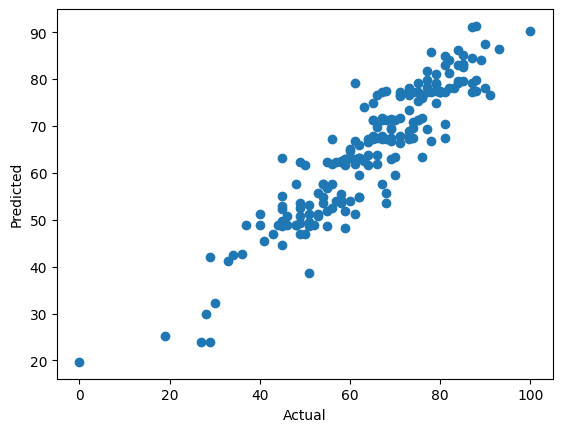

In [76]:
#Lets look at the output by plotting scatter plot 

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

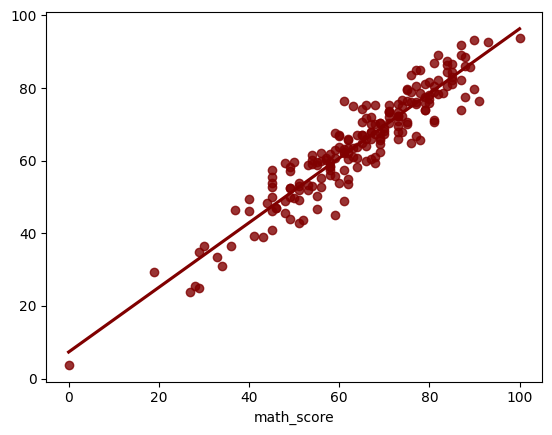

In [83]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='maroon')

##### Lets see the actual value and difference in predicted values

In [85]:
pd.DataFrame({'Actual_values':y_test,'Predicted_values':y_pred,'Difference':(y_test-y_pred)})

,Actual_values,Predicted_values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
